In [1]:
# !conda install lightgbm

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
# from scipy.stats import permutation_test
from scipy.spatial.distance import euclidean,cosine
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, explained_variance_score, mean_absolute_percentage_error
# import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
from scipy.sparse.linalg import lsqr as sparse_lsqr

In [4]:
import scipy
print(scipy.__file__)

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py


In [5]:
sensor_df = pd.read_csv("SensorData_small.csv")

(array([4483., 1863., 2128., 1562.,  956., 1934., 2219., 4285., 7005.,
        8402.]),
 array([    0. ,  3784.8,  7569.6, 11354.4, 15139.2, 18924. , 22708.8,
        26493.6, 30278.4, 34063.2, 37848. ]),
 <BarContainer object of 10 artists>)

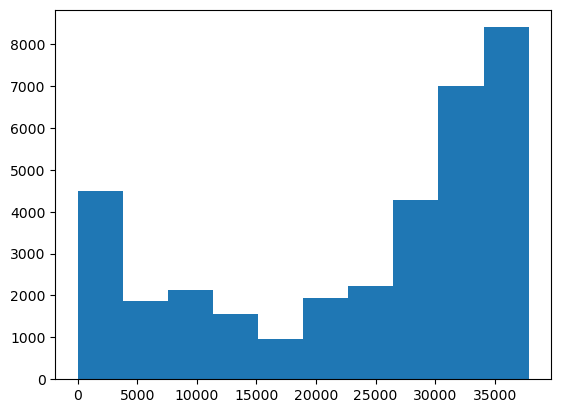

In [6]:
plt.hist(sensor_df['Time'])

In [7]:
sensor_df.head()
sensor_df["Amount"]=(sensor_df["Amount"]-sensor_df["Amount"].mean())/sensor_df["Amount"].std()
sensor_df["Time"]=(sensor_df["Time"]-sensor_df["Time"].mean())/sensor_df["Time"].std()
sensor_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.909969,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.287897,0
1,-1.909969,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.355366,0
2,-1.909888,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.290639,0
3,-1.909888,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.173543,0
4,-1.909807,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.060725,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34832,1.148597,1.304083,-0.285770,-0.340846,-0.046637,0.116827,0.318859,-0.199270,0.128811,0.859327,...,-0.262652,-0.637530,-0.159614,-1.294839,0.490899,1.131015,-0.078832,-0.021608,-0.288776,0
34833,1.148758,1.194245,0.232805,0.626508,0.551191,-0.474094,-0.769367,0.009781,-0.106453,-0.318803,...,-0.182625,-0.548361,0.138009,0.546797,0.178350,0.061976,-0.029636,0.013011,-0.338510,0
34834,1.148839,-1.314945,-0.408721,2.844002,-0.291116,0.550643,0.654924,-0.309365,0.489621,0.335221,...,0.066109,0.214404,-0.083451,-0.283768,0.051178,0.259297,-0.136268,-0.159265,-0.257736,0
34835,1.148920,1.252570,1.220494,-2.148191,1.156019,1.819153,-0.236395,0.629757,-0.064413,-0.749796,...,-0.208746,-0.458681,-0.372473,-1.642775,0.964670,-0.200875,0.056027,0.071958,-0.350287,0


In [8]:
sensor_val_df = sensor_df[[f"V{x}" for x in range(1,29)] + ["Class","Time","Amount"]] 

sensor_label = sensor_df['Class']
X_train, X_test, y_train, y_test = train_test_split(sensor_val_df, sensor_label, test_size=0.20, random_state=100)

sensor_val_df_pos = X_train.loc[X_train.Class==1,:][[f"V{x}" for x in range(1,29)] + ["Time","Amount"]]

sensor_val_df_neg = X_train.loc[X_train.Class==0,:][[f"V{x}" for x in range(1,29)] + ["Time","Amount"]]

del X_train["Class"]
del X_test["Class"]

In [9]:
sensor_val_df_pos

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time,Amount
29687,-2.019001,1.491270,0.005222,0.817253,0.973252,-0.639268,-0.974073,-3.146929,-0.003159,-0.121653,...,2.839596,-1.185443,-0.142812,-0.086103,-0.329113,0.523601,0.626283,0.152440,0.966024,-0.363815
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-1.302281,-0.362764
11880,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,-13.088891,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,-0.257112,-0.362764
30398,-3.519030,4.140867,-3.628202,5.505672,-4.057463,-0.905945,-6.652031,2.634524,-4.679402,-6.546242,...,1.582556,0.778710,-0.135707,-0.004278,0.032706,0.362014,0.900925,0.554897,0.991967,-0.327171
6446,0.702710,2.426433,-5.234513,4.416661,-2.170806,-2.667554,-3.878088,0.911337,-0.166199,-5.009249,...,0.551180,-0.009802,0.721698,0.473246,-1.959304,0.319476,0.600485,0.129305,-1.289915,-0.362764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15781,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,-8.303239,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,0.289880,0.070616
6903,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,-7.297803,...,0.716720,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,-1.191799,-0.362764
33276,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,-0.794994,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,1.093881,-0.313249
15751,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,-8.372753,...,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,0.287294,0.070616


In [10]:
param_grid = {
       'learning_rate': [0.1, 0.01,0.001,0.0001],
      'n_estimators': [1000,2000,3000,5000],
      'max_depth': [4, 6,10,20],
      'colsample_bytree': [0.7, 0.8, 0.9],
      'subsample': [0.7, 0.8, 0.9],
      'min_child_samples': [1, 5, 10]
  }

In [11]:
estimator = lgb.LGBMClassifier(random_state = 101)

In [12]:
# model = GridSearchCV(estimator=estimator, 
#                        param_grid=param_grid,
#                        cv=3, 
#                        n_jobs=-1, 
#                        scoring='f1')
# model.fit(X_train, y_train)

In [13]:
# model_bst = model.best_estimator_

In [14]:
model_bst = lgb.LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=4,
               min_child_samples=1, n_estimators=5000, random_state=101,
               subsample=0.7)

model_bst.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=4,
               min_child_samples=1, n_estimators=5000, random_state=101,
               subsample=0.7)

In [15]:
lst1 = pd.DataFrame([[1.9919760961759,0.158475887304227,-2.58344064503516,0.408669992998441,1.15114706077937,-0.0966947441848027,0.223050267455537,-0.0683838777747007,0.577829383844873,-0.888721675865145,0.491140241656789,0.728903319843614,0.380428045513993,-1.94888334870021,-0.832498136300872,0.519435549203291,0.903562376617253,1.19731471799372,0.593508846946918,-0.0176522567052908,-0.164350327825504,-0.295135166851559,-0.0721725311018398,-0.450261313423321,0.313266608995469,-0.289616585696882,0.00298758224342907,-0.0153088128485981,170348,42.53],
                    [-3.11383160738512,0.58586417180689,-5.39973021073242,1.81709247345531,-0.840618465991056,-2.94354779071974,-2.20800192003372,1.05873267723056,-1.63233334974982,-5.24598383776964,1.93351953683592,-5.03046479695456,-1.12745457501155,-6.41662797597451,0.141237234328704,-2.54949823633632,-4.61471706851594,-1.47813794126038,-0.0354803664667244,0.306270740368093,0.583275998701341,-0.269208637986581,-0.456107772584008,-0.183659129549716,-0.328167759255761,0.606115810329683,0.884875539542905,-0.253700318894381,169966,245]])

In [16]:
lst1.columns=X_test.columns

In [17]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time,Amount
32654,1.007717,-0.186574,1.517409,2.828076,-0.952001,0.987959,-0.985429,0.645507,0.637698,0.596492,...,0.079914,0.440680,-0.052049,0.185006,0.384527,0.223076,0.041821,0.009119,1.072464,-0.360488
13661,1.319799,0.355552,-0.271878,0.805041,0.681819,0.389330,-0.024452,-0.044746,1.158370,-0.179388,...,-0.185440,-0.284533,-0.313521,-1.453446,0.856593,-0.276924,-0.021082,-0.013651,0.047177,-0.333957
25040,1.174158,-0.802369,0.574386,-0.652245,-1.294426,-0.805502,-0.563239,-0.054215,-0.975575,0.746535,...,0.017072,-0.333427,0.073583,0.513953,0.125965,-0.518266,-0.013058,0.029301,0.796786,0.066281
12910,-0.538207,1.095253,1.204467,-0.221709,0.676544,0.128499,0.482122,0.023549,0.740999,-0.407078,...,-0.387172,-0.856211,-0.107352,-0.912158,-0.079974,0.076133,0.106690,0.084875,-0.077691,-0.356241
2652,-0.879468,1.010551,1.392045,-1.285551,-0.350980,-0.846060,0.436285,0.101183,0.475171,-0.085721,...,-0.119343,-0.137874,0.066295,0.430079,-0.271870,0.741732,0.402253,0.191646,-1.733215,-0.350331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29599,1.333260,-0.045099,-1.313336,-0.536454,2.116667,3.216123,-0.478882,0.754381,-0.077317,0.044662,...,0.054018,0.067293,-0.162210,1.060101,0.766563,0.522647,-0.036454,0.000993,0.962629,-0.362764
32018,-0.481299,1.246151,1.403784,0.115920,-0.099260,-1.147516,0.758280,-0.165039,-0.437952,-0.420353,...,-0.218349,-0.581840,0.028774,0.675482,-0.195333,0.036952,0.114384,0.100316,1.048541,-0.347485
4872,1.145364,0.639514,0.642016,2.587750,0.175524,-0.120127,0.131446,-0.230042,0.424952,0.258178,...,-0.237931,-0.522219,-0.065427,-0.197450,0.461966,-0.113790,-0.034379,0.024076,-1.555410,-0.163039
13496,-5.073968,4.745765,-0.993196,-1.370683,-0.116757,-0.297826,0.709050,-0.134257,5.230609,6.496040,...,-1.207918,-1.407840,0.049692,-0.932424,1.010905,0.123730,2.130187,1.125799,0.020829,-0.327915


In [18]:
lst1["Amount"]=(lst1["Amount"]-sensor_df["Amount"].mean())/sensor_df["Amount"].std()
lst1["Time"]=(lst1["Time"]-sensor_df["Time"].mean())/sensor_df["Time"].std()

In [19]:
y_pred = model_bst.predict(lst1)

In [20]:
y_pred

array([0, 1], dtype=int64)